<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC11x**

# **Data Preprocessing & Exploratory Data Analysis**

## **Part 1. Data Wrangling**

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### **1-1. Load and Explore the Data**

#### **1-1-a. 각 데이터셋을 데이터프레임으로 불러와 변수 `df1`, `df2`, `df3`에 저장하세요.**

In [ ]:
import pandas as pd
import matplotlib as plt

In [ ]:
%config InlineBackend.figure_format='retina'

In [ ]:
df1 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv')
df2 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv')
df3 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv')

#### **1-1-b. 각 데이터프레임의 결측 데이터를 확인하세요.**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9574 entries, 0 to 9573
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9574 non-null   int64  
 1   geo                9574 non-null   object 
 2   time               9574 non-null   int64  
 3   cell_phones_total  9574 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 299.3+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35334 entries, 0 to 35333
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35334 non-null  int64 
 1   geo         35334 non-null  object
 2   time        35334 non-null  int64 
 3   population  35334 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  273 non-null    int64 
 1   geo         273 non-null    object
 2   country     273 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.5+ KB


#### **1-1-c. 각 데이터프레임의 중복 데이터를 확인하세요.**

In [ ]:
df1[df1.duplicated()]

,Unnamed: 0,geo,time,cell_phones_total


In [ ]:
df2[df2.duplicated()]

,Unnamed: 0,geo,time,population


In [ ]:
df3[df3.duplicated()]

,Unnamed: 0,geo,country


##### **Q1. 위에서 구한 데이터프레임의 결측 데이터의 수와 중복 데이터의 수를 각각 합한 값을 (`a`, `b`, `c`)의 형태로 쓰세요.**

- `a`에는 `df1` 데이터프레임의 결측 데이터 수와 중복 데이터 수를 합한 값이 들어갑니다.
- `b`에는 `df2` 데이터프레임의 결측 데이터 수와 중복 데이터 수를 합한 값이 들어갑니다.
- `c`에는 `df3` 데이터프레임의 결측 데이터 수와 중복 데이터 수를 합한 값이 들어갑니다.




In [ ]:
#(0,0,0)

#### **1-1-d. `df1`에서 `geo` column의 usa와 chn 데이터만 추출하여, `time` 값에 따른 `cell_phones_total` 값의 변화를 볼 수 있도록 하나의 scatter plot을 그리세요.**
- **Tip** : seaborn 라이브러리의 `.scatterplot()`을 사용하여 `hue` 파라미터를 설정할 수 있습니다. 

In [ ]:
df1_u_c = df1[df1['geo'].str.contains('usa|chn')]
df1_u_c

,Unnamed: 0,geo,time,cell_phones_total
1627,1627,chn,1960,0.0
1628,1628,chn,1965,0.0
1629,1629,chn,1970,0.0
1630,1630,chn,1975,0.0
1631,1631,chn,1976,0.0
...,...,...,...,...
9039,9039,usa,2014,355500000.0
9040,9040,usa,2015,382307000.0
9041,9041,usa,2016,396000000.0
9042,9042,usa,2017,400000000.0


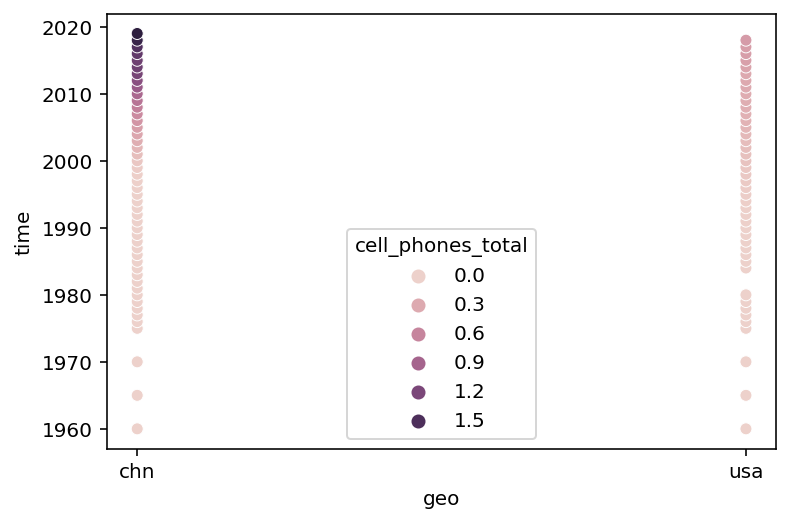

In [ ]:
import seaborn as sns
sns.scatterplot(data = df1_u_c, x = 'geo', y = 'time', hue = 'cell_phones_total')

##### **Q2. Scatter plot에서 두 나라 중 2000년대 이후로 `cell_phones_total` 값이 더 급격하게 증가하는 나라의 `geo`를 쓰세요.**

**`이곳에 Q2에 대한 답을 작성하세요.`**

### **1-2. Join Data**

세 데이터프레임을 합쳐, 하나의 데이터프레임으로 만들어봅니다.



- `df1`과 `df2`에 공통으로 존재하는 column들을 확인한 후, 해당 공통 column들의 교집합인 데이터를 기준으로 합쳐 새로운 데이터프레임을 만드세요. 
- 위에서 만든 데이터프레임과 `df3`를 공통 column의 교집합인 데이터를 기준으로 합쳐 새로운 데이터프레임을 변수 `df4`에 저장하세요.
  - `df4`는 다음과 같으며 shape은 (9568, 5)가 되어야 합니다.

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|

In [ ]:
df1.columns

Index(['Unnamed: 0', 'geo', 'time', 'cell_phones_total'], dtype='object')

In [ ]:
df2.columns

Index(['Unnamed: 0', 'geo', 'time', 'population'], dtype='object')

In [ ]:
df3.columns

Index(['Unnamed: 0', 'geo', 'country'], dtype='object')

In [ ]:
df1 = df1.drop('Unnamed: 0', axis = 1)
df2 = df2.drop('Unnamed: 0', axis = 1)
df3 = df3.drop('Unnamed: 0', axis = 1)

In [ ]:
df1_2 =  df1.merge(df2, on = ['geo','time'])
df1_2

,geo,time,cell_phones_total,population
0,abw,1960,0.0,54211
1,abw,1965,0.0,57360
2,abw,1970,0.0,59063
3,abw,1975,0.0,60657
4,abw,1976,0.0,60586
...,...,...,...,...
9563,zwe,2015,12757410.0,13814629
9564,zwe,2016,12878926.0,14030331
9565,zwe,2017,14092104.0,14236595
9566,zwe,2018,12908992.0,14438802


In [ ]:
df4 = df1_2.merge(df3, on ='geo')
df4

,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211,Aruba
1,abw,1965,0.0,57360,Aruba
2,abw,1970,0.0,59063,Aruba
3,abw,1975,0.0,60657,Aruba
4,abw,1976,0.0,60586,Aruba
...,...,...,...,...,...
9563,zwe,2015,12757410.0,13814629,Zimbabwe
9564,zwe,2016,12878926.0,14030331,Zimbabwe
9565,zwe,2017,14092104.0,14236595,Zimbabwe
9566,zwe,2018,12908992.0,14438802,Zimbabwe


In [ ]:
df4.shape

(9568, 5)

##### **Q3. `df4`에서 `index==9500`에 해당하는 row의 모든 값을 (`geo`, `time`, `cell_phones_total`, `population`, `country`) 형태로 쓰세요. (단, 숫자형 데이터는 모두 정수형으로 씁니다.)** <br>
> **ex)**
> `index == 0` 인 경우에는 다음과 같이 표기합니다 **(abw, 1960, 0, 54211, Aruba)**

In [ ]:
df4.loc[0]

geo                    abw
time                  1960
cell_phones_total      0.0
population           54211
country              Aruba
Name: 0, dtype: object

In [ ]:
df4.loc[9500]

geo                       zmb
time                     2000
cell_phones_total     98853.0
population           10415944
country                Zambia
Name: 9500, dtype: object

In [ ]:
pd.set_option('display.max_rows', None)
df4
pd.set_option('display.max_rows', 60)

In [ ]:
pd.set_option('display.max_rows', None)

**`이곳에 Q3에 대한 답을 작성하세요.`**

In [ ]:
#(zmb, 2000, 98853, 10415944, Zambia)

### **1-3. Feature Engineering**

#### **1-3-a. 인구당 cell phone 수를 나타내는 데이터를 새로운 feature `PPP`에 저장하세요.**
```
(인구당 cell phone 수 (PPP)) = (cell phone 총 개수) / (인구)
```

In [ ]:
df4.sample(3)

,geo,time,cell_phones_total,population,country
7585,sen,1987,0.0,6875754,Senegal
5034,lby,2010,10900000.0,6197663,Libya
8863,uga,1984,0.0,14082875,Uganda


In [ ]:
#df4['cell_phones_total'] = df4['cell_phones_total'].astype(int)
#df4.info()

In [ ]:
df4 = df4.assign(PPP=df4['cell_phones_total'] / df4['population'])
df4.sample(10)

,geo,time,cell_phones_total,population,country,PPP
6247,nam,1983,0.0,1131632,Namibia,0.000000
7500,sau,1998,627321.0,19783304,Saudi Arabia,0.031710
3225,gha,2018,40934875.0,29767102,Ghana,1.375172
3943,hun,1992,23292.0,10358619,Hungary,0.002249
4214,isl,1976,0.0,220291,Iceland,0.000000
2168,cyp,1996,70781.0,873423,Cyprus,0.081039
6800,pan,1965,0.0,1314677,Panama,0.000000
7222,pry,2003,1770345.0,5632983,Paraguay,0.314282
2146,cyp,1970,0.0,613618,Cyprus,0.000000
8664,tun,1960,0.0,4178236,Tunisia,0.000000


#### **1-3-b. 나라별 평균 PPP를 구하고, 평균 PPP 값이 높은 순서대로 데이터를 정렬하세요.**
- 결과는 데이터프레임 형태로 반환합니다. 
- 데이터 정렬 후 index를 재설정하세요. 

|country|PPP|
|:-:|:-:|
|Sint Maarten (Dutch part)|1.899506|
|Montenegro|1.574349|
|Curaçao|1.259227|
|Serbia|0.951586|
|Israel|0.840197|
|Macao, China|0.818130|
|...|...|

In [ ]:
df4.groupby('country')['PPP'].mean().sort_values(ascending = False).reset_index()

,country,PPP
0,Sint Maarten (Dutch part),1.899506
1,Montenegro,1.574349
2,Curaçao,1.259227
3,Serbia,0.951586
4,Israel,0.840197
5,"Macao, China",0.818130
6,"Hong Kong, China",0.810664
7,Liechtenstein,0.806225
8,Saudi Arabia,0.757034
9,United Arab Emirates,0.741916


##### **Q4. 위 과정을 모두 수행한 데이터프레임에서 `index==210`인 나라는 어디인가요?**

> **ex)** `index == 0` 인 나라는 **Sint Maarten (Dutch part)** 입니다.

**`이곳에 Q4에 대한 답을 작성하세요.`**

In [ ]:
#Eritrea

## **Part 2. Data Visualization**

이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.

아래 cell 을 실행하면 자동으로 data가 load 되며, `data_for_graph`라는 이름의 dataframe을 얻게 됩니다. 

(원하신다면 추가 시각화를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})

df['Month'] = df['date'].dt.month 
df = df.set_index('date')
df = df.sort_index()
# df.head()

data_for_graph = df.loc[datetime.date(2019, 1, 1):]
print(data_for_graph.shape)
data_for_graph.head()

(42, 3)


,biden_cable_multiple,biden_online_multiple,Month
date,,,
2019-01-06,0.431604,0.492401,1
2019-01-13,0.990476,0.360000,1
2019-01-20,0.423497,0.440758,1
2019-01-27,0.204420,0.274752,1
2019-02-03,0.276596,0.334471,2


#### **2-1. `data_for_graph`에서 각 column의 <u>월별 평균 값</u>을 Line graph로 그리세요.**
> 아래의 조건을 모두 만족해야 합니다.

- `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 다른 색을 가져야 합니다. 
- 각 라인이 `Cable News`와 `Online News` 중 무엇을 나타내는지 범례를 표시합니다.
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


In [ ]:
data_for_graph.groupby('Month').mean()

,biden_cable_multiple,biden_online_multiple
Month,,
1,0.512499,0.391978
2,0.345931,0.329717
3,1.736847,0.855717
4,1.997199,0.814604
5,3.054963,1.259382
6,2.815542,1.280751
7,1.906604,1.051410
8,1.849255,1.007523
9,3.208285,2.248763


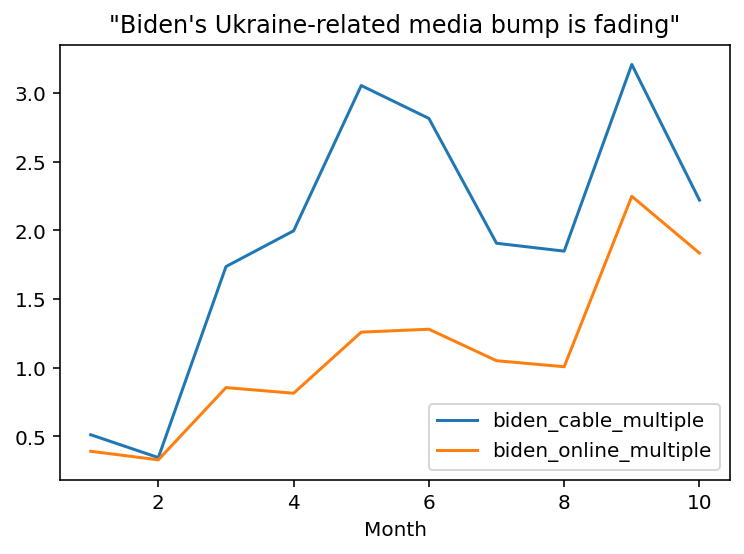

In [ ]:
m_l = data_for_graph.groupby('Month').mean().plot()
m_l.set_title('\"Biden\'s Ukraine-related media bump is fading\"');

In [ ]:
data_for_graph_c = data_for_graph.groupby('Month',as_index = False).mean()
data_for_graph_c.columns

Index(['Month', 'biden_cable_multiple', 'biden_online_multiple'], dtype='object')

##### **Q5. `Cable News`와 `Online News` 중 6월~8월 사이에 <u>월별 평균 값</u>이 더 높은 것은 무엇인가요?**

**`이곳에 Q5에 대한 답을 작성하세요.`**

In [ ]:
#Cable News

## **Part 3. 도전 과제**
위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 내용 또한 만족하는 경우 3점을 얻을 수 있습니다.  

아래 요구사항은 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

### **3-1. Filtering**

In [ ]:
pd.set_option('display.max_rows', 60)
df4

,geo,time,cell_phones_total,population,country,PPP
0,abw,1960,0.0,54211,Aruba,0.000000
1,abw,1965,0.0,57360,Aruba,0.000000
2,abw,1970,0.0,59063,Aruba,0.000000
3,abw,1975,0.0,60657,Aruba,0.000000
4,abw,1976,0.0,60586,Aruba,0.000000
...,...,...,...,...,...,...
9563,zwe,2015,12757410.0,13814629,Zimbabwe,0.923471
9564,zwe,2016,12878926.0,14030331,Zimbabwe,0.917935
9565,zwe,2017,14092104.0,14236595,Zimbabwe,0.989851
9566,zwe,2018,12908992.0,14438802,Zimbabwe,0.894049


##### **Q6. 2017년은 중국에서 people(인구수)보다 cell phone 개수가 더 많아지는 첫 번째 해입니다. 미국의 경우, cell phone의 개수가 people보다 더 많아지는 첫 번째 해는 언제인가요?**
  - **Part1**의 `df4`로부터 답을 도출합니다. 


In [ ]:
df_b = df4.query('cell_phones_total > population')
df_b[df_b['geo'] == 'chn']

,geo,time,cell_phones_total,population,country,PPP
1672,chn,2017,1.469882e+09,1421021791,China,1.034384
1673,chn,2018,1.649302e+09,1427647786,China,1.155258
1674,chn,2019,1.725695e+09,1433783686,China,1.203595


In [ ]:
df_b[df_b['geo'] == 'usa']

,geo,time,cell_phones_total,population,country,PPP
9033,usa,2014,355500000.0,318673411,United States,1.115562
9034,usa,2015,382307000.0,320878310,United States,1.191439
9035,usa,2016,396000000.0,323015995,United States,1.225945
9036,usa,2017,400000000.0,325084756,United States,1.230448
9037,usa,2018,422000000.0,327096265,United States,1.290140


### **3-2. Advanced Visualization**

**Part 2**에서 그린 그래프를 마케팅 부서에 전달하려고 합니다. 이때 다른 사람들이 그래프를 이해할 수 있도록 완성도를 높여야 합니다.

#### **다음 순서에 따라 시각화의 완성도를 높여 보세요.**

- 그래프의 스타일을 지정해 봅니다. 
  - `plt.style.available`이 어떤 메소드인지 찾아보고, 이를 실행했을 때 반환되는 결과들에 대해서 알아보세요. 
    - [Style Plots using Matplotlib](https://www.geeksforgeeks.org/style-plots-using-matplotlib/#:~:text=Matplotlib%20is%20the%20most%20popular,without%20using%20any%20other%20GUIs) 
    - [Style sheets reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
  - 검색한 내용을 바탕으로 본인이 원하는 스타일로 지정해 봅니다. 
- **Part2** 에서 그린 그래프보다 크기가 커지도록 크기를 조정합니다. 
- **Part2** 에서 그린 그래프의 x축에는 짝수 월만 표시되어 있습니다. x축 단위를 지정하여 홀수 월도 모두 표시되도록 합니다. 
- x축과 y축에 각각 label(이름)을 붙여 봅니다. 
- title이 강조되도록 title의 크기를 키운 후 bold 처리해 줍니다. 
- 그래프가 나타내는 바를 이해할 수 있도록 다음 부제목을 추가하고, title보다 작은 크기로 설정합니다. "Biden's share of media mentions on each medium relative to the next most-mentioned candidate each week"
  - 가독성을 위해 문장 중간에 `\n`을 삽입해보세요.
  - 부제목의 위치를 조정하여 title 바로 아래에 위치하도록 합니다. 
- 각 라인이 `Cable News`와 `Online News` 중 무엇을 나타내는지 명시해 줍니다.

In [ ]:
import numpy as np
import matplotlib.ticker as ticker

In [ ]:
data_for_graph_c = data_for_graph.groupby('Month',as_index = False).mean()
data_for_graph_c.columns

Index(['Month', 'biden_cable_multiple', 'biden_online_multiple'], dtype='object')

<ipython-input-80-17e9b0e886d5>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


Text(0, 0.5, 'Mean')

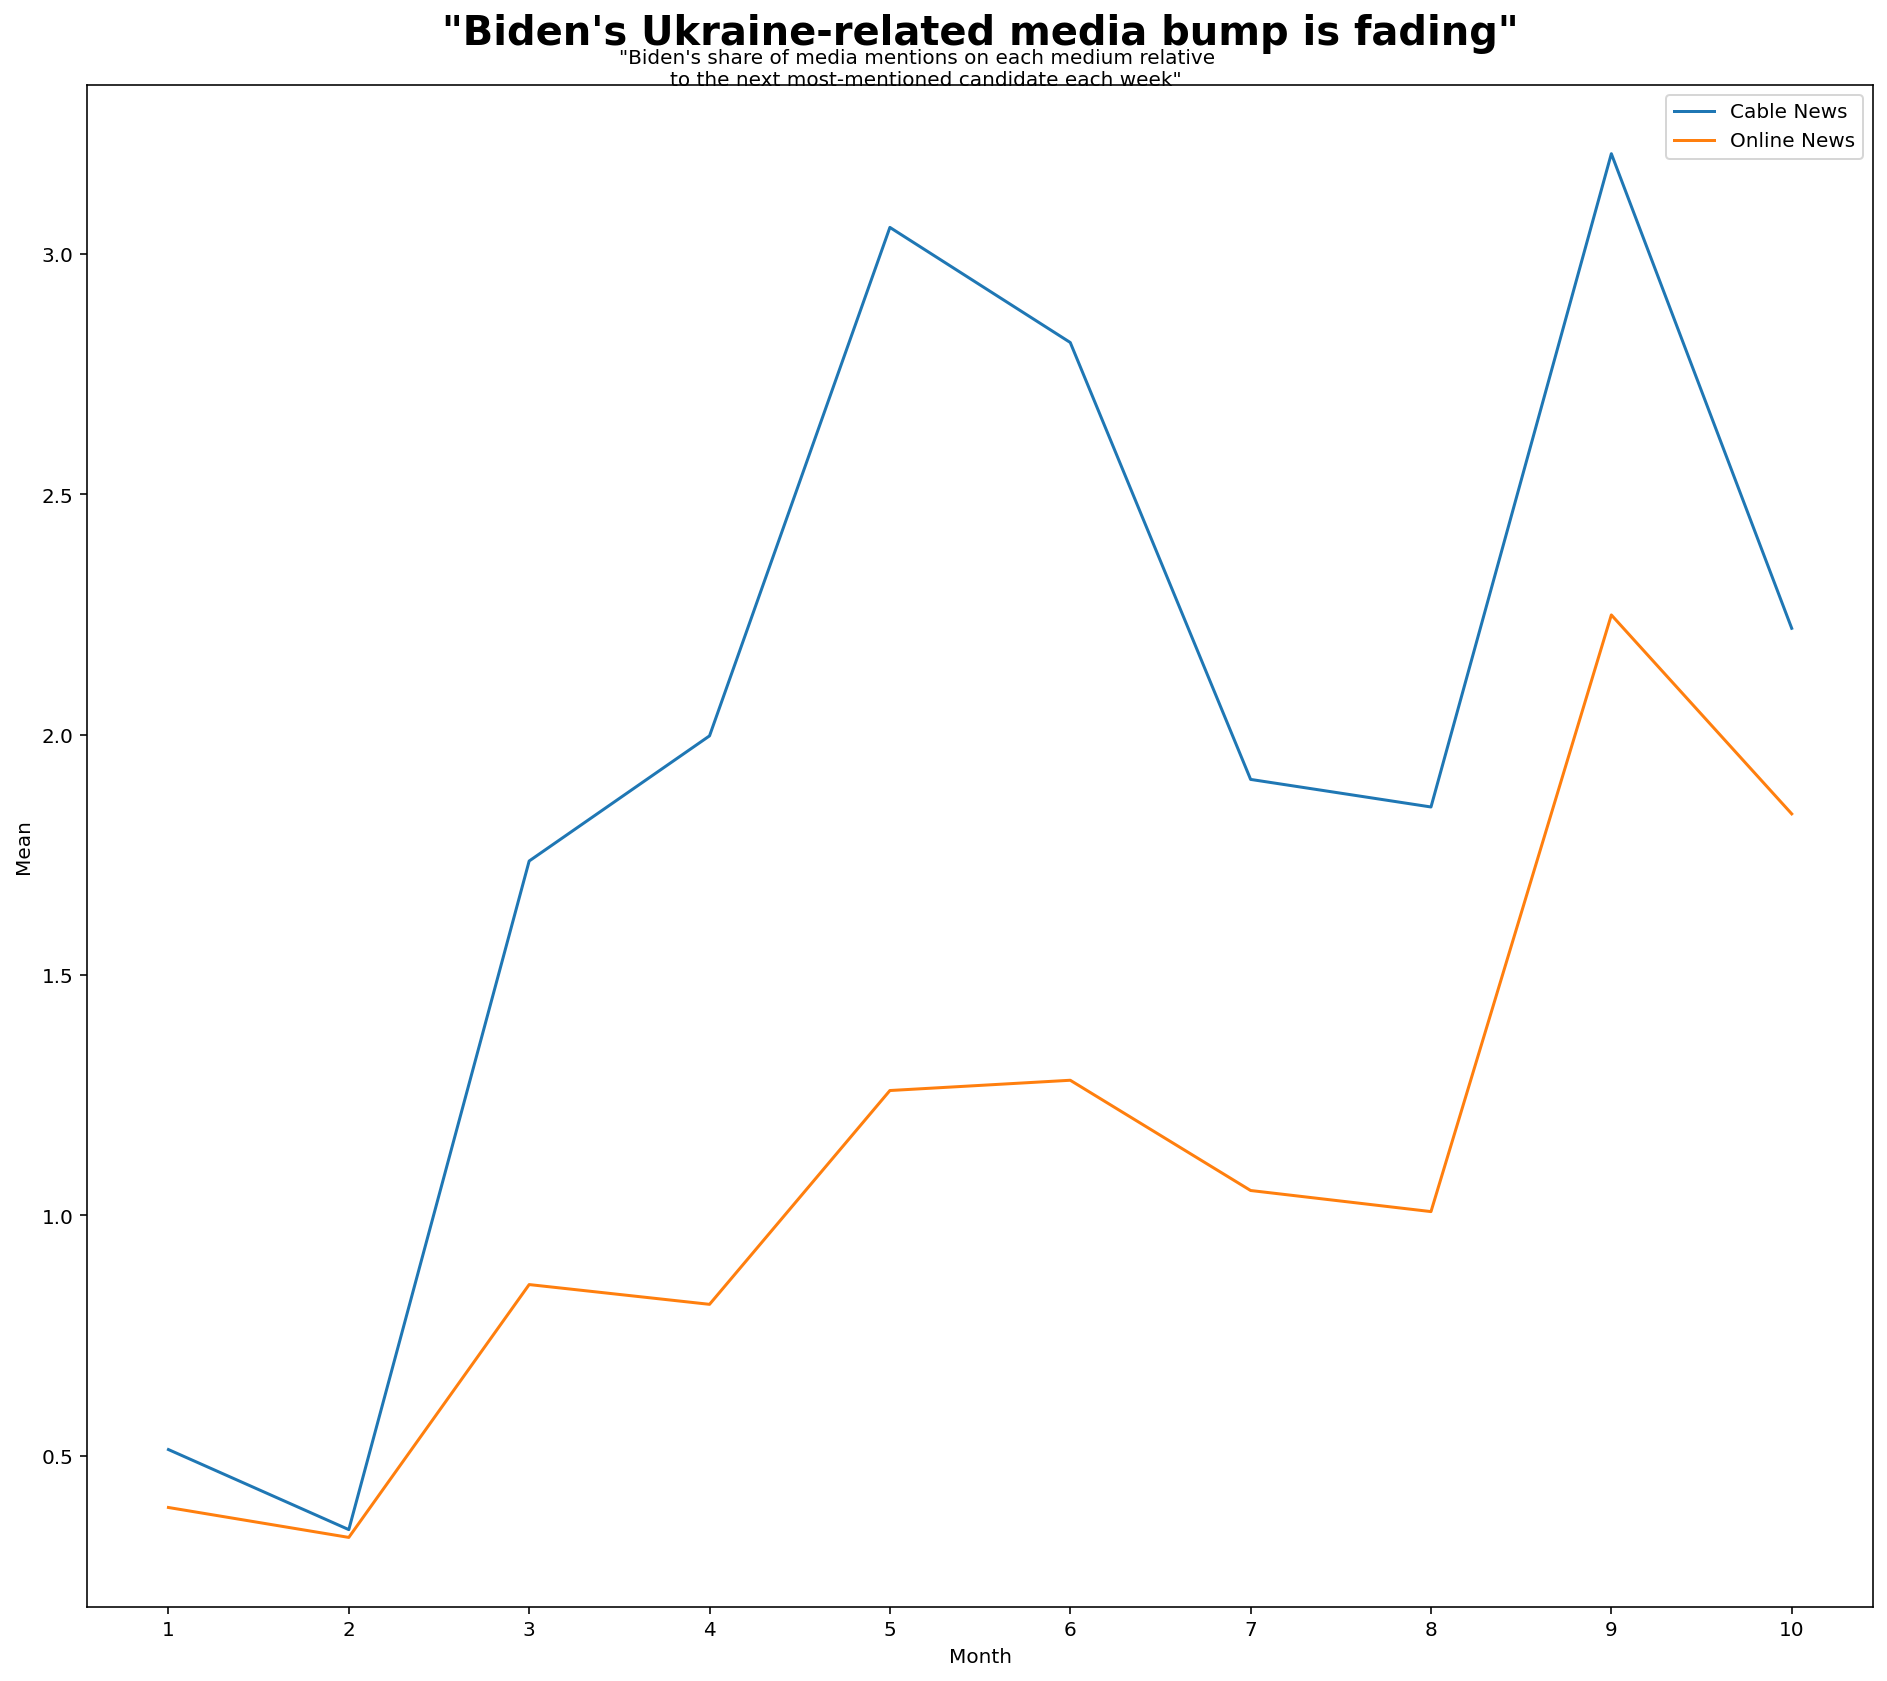

In [ ]:
plt.figure(figsize=(16, 14))
plt.plot(data_for_graph_c.Month,data_for_graph_c.biden_cable_multiple,label='Cable News')
plt.plot(data_for_graph_c.Month,data_for_graph_c.biden_online_multiple,label='Online News')
plt.legend()
plt.title('\"Biden\'s Ukraine-related media bump is fading\"\n')
plt.text(3.5,3.35,'\"Biden\'s share of media mentions on each medium relative \n        to the next most-mentioned candidate each week\"')

title_font = {
    'fontsize': 20,
    'fontweight': 'bold'
}


plt.title('\"Biden\'s Ukraine-related media bump is fading\"', fontdict=title_font, pad=20)


ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.xlabel('Month')
plt.ylabel('Mean')

##### **Q7. 완성한 시각화의 이미지의 URL을 복사하여 붙여넣어주세요.**

- 다음 이미지를 참고하여 이미지의 URL을 복사하여 붙여넣어주세요.

    1. 출력된 이미지 위에서 마우스 우클릭 후 해당 이미지를 저장합니다.
    2. 저장한 이미지 파일을 [이미지 URL 생성 페이지](http://imgur.com/upload)에 업로드합니다.
    3. 업로드 된 이미지 위에서 마우스 우클릭 후 해당 이미지의 주소를 복사합니다.




<img src='https://i.imgur.com/Hu8vce7.png' width="360" height="350">
<img src='https://i.imgur.com/Y00z7IY.png' width="280" height="350">
<img src='https://i.imgur.com/egZNZp0.png' width="320" height="350">

In [ ]:
# 위와 같이 복사한 URL이 아래의 예시와 동일한 형식인지 확인한 후 url 변수에 저장하세요.

# 예시 : "https://i.imgur.com/xxxxxx.png"
url = "https://imgur.com/a/sbGUhJ3"

In [ ]:
# 위의 셀을 실행했다면 아래 주석처리 되어있는 부분의 주석을 풀고 셀을 실행해보세요.
# 이미지가 잘 출력되었다면 UrClass에 URL을 제출해주세요.

import urllib.request
from PIL import Image

display(Image.open(urllib.request.urlretrieve(url)[0]))

UnidentifiedImageError: ignored